# Importing Libs

In [1]:
import pandas as pd
import numpy as np

# Loading Dataset & Summarizing

In [5]:
data1 = pd.read_csv("salary_est.csv")
print(data1.shape)
print(data1.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


# Mapping Salary Data

In [8]:
income_Set = set(data1['income'])
data1['income'] = data1['income'].map({'<=50K' : 0, '>50K':1}).astype(int)
print(data1.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


# Segregate Dataset into X n Y

In [11]:
x = data1.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [12]:
y = data1.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

# Splitting Dataset into Train n Test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Finding the best K value for the model

Text(0, 0.5, 'Mean Error')

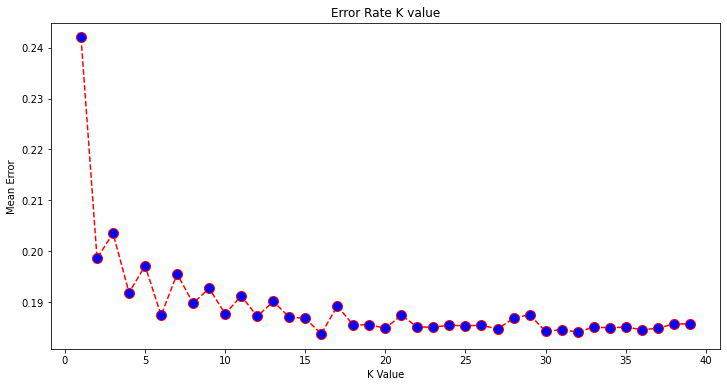

In [19]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

mp.figure(figsize = (12,6))
mp.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o',markerfacecolor = 'blue',markersize = 10)
mp.title("Error Rate K value")
mp.xlabel('K Value')
mp.ylabel('Mean Error')

# Training Dataset

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16,metric = 'minkowski',p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

# Prediction for new data

In [21]:
age = int(input("Enter the New Employee Age : "))
edu = int(input("Enter the New Employee Education : "))
cg = int(input("Enter the New Employee Capital Gain :"))
wh = int(input("Enter the New Employee work hours per week: "))
newem = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newem))
print(result)

if(result == 1):
    print("Employee has a Salary above 50K")
else:
    print("Employee has a Salary below 50K")

Enter the New Employee Age : 23
Enter the New Employee Education : 10
Enter the New Employee Capital Gain :0
Enter the New Employee work hours per week: 50
[0]
Employee has a Salary below 50K


# Prediction for all datasets

In [30]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Accuracy of the Model

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

print(cm)
print("Accuracy of the model : {0}%".format(accuracy_score(y_test,y_pred)*100))

[[5882  311]
 [1185  763]]
Accuracy of the model : 81.62387913032796%


# End of the Module